In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
tdf = pd.read_csv('grouped_w_topics.csv')

In [12]:
tdf

,Unnamed: 0,date,speaker,text_enhanced,tokens,tprob_0,tprob_1,tprob_2,tprob_3,tprob_4,...,tprob_36,tprob_37,tprob_38,tprob_39,tprob_40,tprob_41,tprob_42,tprob_43,tprob_44,len
0,1696,1994-02-04,CHAIRMAN GREENSPAN.,"As you know, this is our organizational meetin...","['know', 'organiz', 'meet', 'alway', 'meet', '...",0.004404,0.008949,0.002653,0.006702,0.002750,...,0.001986,0.011369,0.004209,0.002528,0.002396,0.006632,0.015304,0.009786,0.012351,3586
1,1697,1994-02-04,MR. BERNARD.,"Secretary and Economist, Donald Kohn; Deputy S...","['secretari', 'economist', 'donald', 'kohn', '...",0.008159,0.007811,0.007978,0.008344,0.007726,...,0.008027,0.008027,0.008939,0.008031,0.010811,0.008585,0.007967,0.008053,0.195102,308
2,1698,1994-02-04,MR. BOEHNE.,"Normally in an economic expansion, development...","['normal', 'econom', 'expans', 'develop', 'rea...",0.029416,0.008627,0.010394,0.008996,0.014087,...,0.008765,0.016873,0.009061,0.009083,0.007732,0.014896,0.019493,0.013738,0.011027,572
3,1699,1994-02-04,MR. BROADDUS.,My report is going to be pretty bland after th...,"['report', 'go', 'pretti', 'bland', 'develop',...",0.022651,0.009844,0.010668,0.007975,0.065438,...,0.022021,0.054781,0.008207,0.009382,0.012754,0.028455,0.032175,0.034483,0.018991,626
4,1700,1994-02-04,MR. COYNE.,"Oh, believe me, you will get asked! I think i...","['oh', 'believ', 'get', 'ask', 'think', 'take'...",0.021370,0.021370,0.022228,0.022331,0.021370,...,0.021370,0.021370,0.021938,0.021774,0.021370,0.022437,0.023204,0.021636,0.021370,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,6827,2017-12-13,MS. BRAINARD.,I don't think of this as a normative statement...,"[""n't"", 'think', 'norm', 'statement', 'think',...",0.012810,0.007640,0.029548,0.007228,0.005717,...,0.010681,0.023409,0.020669,0.006386,0.038567,0.006075,0.021845,0.068142,0.014719,1225
4956,6828,2017-12-13,MS. GEORGE.,"Lorie, on exhibit 2, chart 12, would you expla...","['lori', 'exhibit', '2', 'chart', '12', 'would...",0.010186,0.023319,0.013816,0.014220,0.025812,...,0.009199,0.010526,0.008858,0.030778,0.015868,0.010058,0.012528,0.045103,0.008281,775
4957,6829,2017-12-13,MS. LOGAN.,Thank you. I will begin on your second exhibi...,"['thank', 'begin', 'second', 'exhibit', 'discu...",0.004748,0.005915,0.006965,0.133128,0.004600,...,0.008116,0.007262,0.006452,0.005348,0.010026,0.005117,0.006005,0.005974,0.004939,945
4958,6830,2017-12-13,MS. MESTER.,"Thank you, Madam Chair. Reports received from...","['thank', 'madam', 'chair', 'report', 'receiv'...",0.045581,0.014212,0.014528,0.005391,0.005924,...,0.006739,0.010212,0.015199,0.007071,0.274467,0.020371,0.013990,0.011407,0.009780,1277


NBER recession indicators as determined by the NBER, via [FRED](https://fred.stlouisfed.org/series/USREC). Both endpoints are inclusive.

In [35]:
recessions = [
    {'start': '2001-04', 'end': '2001-11'},
    {'start': '2008-01', 'end': '2009-06'}
]

In [16]:
for i in range(45):
    # probability weighted by number of tokens
    tdf[f'w_prob_{i}'] = tdf[f'tprob_{i}'] * tdf['len']

In [79]:
wprob_cols = [*[f'w_prob_{i}' for i in range(45)]]

In [17]:
tdf.columns

Index(['Unnamed: 0', 'date', 'speaker', 'text_enhanced', 'tokens', 'tprob_0',
       'tprob_1', 'tprob_2', 'tprob_3', 'tprob_4', 'tprob_5', 'tprob_6',
       'tprob_7', 'tprob_8', 'tprob_9', 'tprob_10', 'tprob_11', 'tprob_12',
       'tprob_13', 'tprob_14', 'tprob_15', 'tprob_16', 'tprob_17', 'tprob_18',
       'tprob_19', 'tprob_20', 'tprob_21', 'tprob_22', 'tprob_23', 'tprob_24',
       'tprob_25', 'tprob_26', 'tprob_27', 'tprob_28', 'tprob_29', 'tprob_30',
       'tprob_31', 'tprob_32', 'tprob_33', 'tprob_34', 'tprob_35', 'tprob_36',
       'tprob_37', 'tprob_38', 'tprob_39', 'tprob_40', 'tprob_41', 'tprob_42',
       'tprob_43', 'tprob_44', 'len', 'w_prob_0', 'w_prob_1', 'w_prob_2',
       'w_prob_3', 'w_prob_4', 'w_prob_5', 'w_prob_6', 'w_prob_7', 'w_prob_8',
       'w_prob_9', 'w_prob_10', 'w_prob_11', 'w_prob_12', 'w_prob_13',
       'w_prob_14', 'w_prob_15', 'w_prob_16', 'w_prob_17', 'w_prob_18',
       'w_prob_19', 'w_prob_20', 'w_prob_21', 'w_prob_22', 'w_prob_23',
       'w_

In [25]:
tdf['date_pd'] = pd.to_datetime(tdf['date'])
pd.PeriodIndex(tdf['date_pd'], freq='M')

PeriodIndex(['1994-02', '1994-02', '1994-02', '1994-02', '1994-02', '1994-02',
             '1994-02', '1994-02', '1994-02', '1994-02',
             ...
             '2017-12', '2017-12', '2017-12', '2017-12', '2017-12', '2017-12',
             '2017-12', '2017-12', '2017-12', '2017-12'],
            dtype='period[M]', name='date_pd', length=4960)

In [65]:
def is_recession(date):
    # print(str(date))
    for recession in recessions:
        range = pd.period_range(start=recession['start'], end=recession['end'], freq='M')
        if date in range:
            return 1
    return 0

In [62]:
tdf_m = tdf.groupby(pd.PeriodIndex(tdf['date_pd'], freq='M'))[wprob_cols].sum().reset_index()

In [63]:
tdf_m

,date_pd,w_prob_0,w_prob_1,w_prob_2,w_prob_3,w_prob_4,w_prob_5,w_prob_6,w_prob_7,w_prob_8,...,w_prob_35,w_prob_36,w_prob_37,w_prob_38,w_prob_39,w_prob_40,w_prob_41,w_prob_42,w_prob_43,w_prob_44
0,1994-02,225.195661,188.141667,190.362141,226.695376,254.627472,420.188462,379.384308,165.558718,148.799477,...,336.394715,231.074818,354.051006,180.718510,181.816147,147.812903,351.133021,229.075452,787.018461,308.466633
1,1994-03,462.402519,185.687604,157.850607,194.698922,189.109120,311.107616,2473.479876,180.475566,137.874310,...,293.537866,214.457500,420.586965,267.782074,169.519468,154.394686,465.168522,180.518099,283.949356,245.030036
2,1994-05,857.027395,118.104239,113.602279,137.420995,191.895117,271.982478,274.766933,197.957561,172.321222,...,268.450843,142.288776,226.395085,143.481494,123.856032,135.081754,171.813034,119.632954,275.135420,124.594431
3,1994-07,741.625076,203.594041,247.900208,182.047179,421.469300,618.152455,399.164292,276.821912,182.211971,...,621.116574,311.624852,492.947675,217.607764,195.958393,319.747113,766.834387,262.146804,343.602337,224.354520
4,1994-08,197.687142,133.121935,117.280008,127.338816,216.899412,194.972649,153.777712,145.644790,127.629904,...,258.177735,207.387904,225.924511,187.204393,119.368699,174.530924,179.042447,155.833314,558.966036,122.732910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,2017-06,349.772124,489.459170,611.048038,341.453830,360.828441,849.827499,287.638594,1648.630467,1970.917193,...,991.196612,228.136500,349.388097,359.990001,439.292508,728.082795,440.612058,760.619288,1126.863800,235.069095
188,2017-07,401.949493,487.862950,438.727777,284.757637,407.862443,664.667231,317.283640,732.063876,1749.003846,...,450.054047,200.869932,219.202463,1502.346155,361.931131,468.472100,302.312714,525.051966,340.490727,291.545756
189,2017-09,328.345564,404.634640,364.151418,321.063253,415.330621,668.779939,310.589562,1325.657545,2441.282563,...,371.273642,186.799837,275.310704,259.306161,421.219919,873.520583,239.935106,445.473252,546.314474,275.612330
190,2017-11,257.388206,279.938736,285.231346,298.428972,460.195056,737.048788,339.572913,615.638589,1355.941845,...,308.078013,165.475117,233.439592,1305.162604,593.791962,518.386478,230.346537,826.419057,705.128371,262.672376


In [66]:
tdf_m['rec'] = tdf_m.date_pd.apply(is_recession)

In [74]:
rtdf = tdf_m.groupby('rec')[wprob_cols].sum().reset_index()

In [78]:
rtdf['total'] = rtdf[wprob_cols].sum(axis=1)

In [81]:
for i in range(45):
    # "share" of attention
    rtdf[f'w_prob_{i}_s'] = rtdf[f'w_prob_{i}'] / rtdf['total']

In [84]:
prob_share_cols = [*[f'w_prob_{i}_s' for i in range(45)]]

In [113]:
procyclicality_ind = (rtdf.loc[1, prob_share_cols] * -1 + rtdf.loc[0, prob_share_cols]).reset_index().rename({0: 'procyclicality'}, axis=1)['procyclicality'].sort_values(ascending=True)

<BarContainer object of 45 artists>

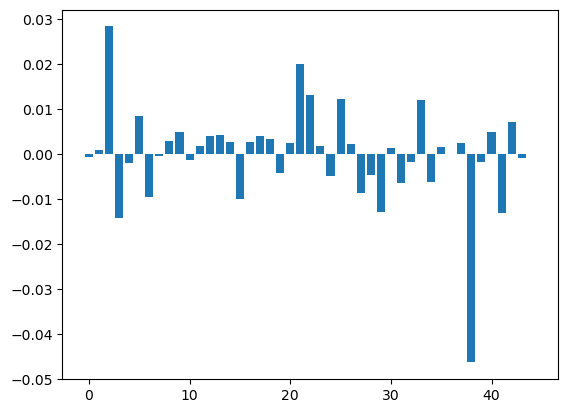

In [121]:
plt.bar(procyclicality_ind.index, procyclicality_ind.values)

In [118]:
procyclicality_ind.index

Index([38,  3, 41, 29, 15,  6, 27, 31, 34, 24, 28, 19,  4, 32, 39, 10, 43,  0,
        7, 44, 36,  1, 30, 35, 23, 11, 26, 20, 37, 16, 14,  8, 18, 17, 12, 13,
        9, 40, 42,  5, 33, 25, 22, 21,  2],
      dtype='int64')

In [120]:
procyclicality_ind.values

array([-4.62696859e-02, -1.41682005e-02, -1.30929666e-02, -1.27579020e-02,
       -1.00481489e-02, -9.42838112e-03, -8.71369569e-03, -6.30107579e-03,
       -6.20097858e-03, -4.86071991e-03, -4.69461288e-03, -4.24818691e-03,
       -2.01190785e-03, -1.78138178e-03, -1.74468975e-03, -1.36043636e-03,
       -8.93658589e-04, -6.27080464e-04, -5.08654841e-04, -5.22491848e-05,
        6.86847352e-05,  8.33669228e-04,  1.37831650e-03,  1.52357356e-03,
        1.81036505e-03,  1.88636814e-03,  2.23741430e-03,  2.39988688e-03,
        2.44963260e-03,  2.71448741e-03,  2.80693953e-03,  2.92053725e-03,
        3.30697827e-03,  4.00080760e-03,  4.04394441e-03,  4.35070564e-03,
        4.91533726e-03,  5.00329863e-03,  7.10317384e-03,  8.37650183e-03,
        1.21094830e-02,  1.21734442e-02,  1.30491200e-02,  1.99443387e-02,
        2.83576050e-02])